## Ensemble Learning - Comparation of different methods

### Importing libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### Import dataset

In [2]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [3]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=.2, random_state=42)

### Scaling data

In [4]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)

X_validation_sc = scaler.transform(X_validation)

X_test_sc = scaler.transform(X_test)

In [5]:
X_train_sc.shape

(364, 30)

### Applying GridSearchCV to find the best parameters - Decision Tree

In [8]:
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_sc, y_train)

best_accuracy = grid_search.best_score_

best_parameters = grid_search.best_params_

print('Best accuracy: {:.2f}%'.format(best_accuracy))
print('Best parameters:', best_parameters)

Best accuracy: 0.94%
Best parameters: {'criterion': 'gini', 'max_depth': 3}


### Applying GridSearchCV to find the best parameters - Random Forest

In [11]:
parameters = {  'criterion': ['gini', 'entropy'],
                'n_estimators': [10, 100, 200],
                'max_depth': [3, 5, 7]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_sc, y_train)

best_accuracy = grid_search.best_score_

best_parameters = grid_search.best_params_

print('Best accuracy: {:.2f}%'.format(best_accuracy))
print('Best parameters:', best_parameters)

Best accuracy: 0.96%
Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 100}


### Applying GridSearchCV to find the best parameters - AdaBoost

In [12]:
parameters = {  'n_estimators': [10, 100, 200],
                'learning_rate': [0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_sc, y_train)

best_accuracy = grid_search.best_score_

best_parameters = grid_search.best_params_

print('Best accuracy: {:.2f}%'.format(best_accuracy))
print('Best parameters:', best_parameters)

Best accuracy: 0.97%
Best parameters: {'learning_rate': 1, 'n_estimators': 200}


### Training and Testing the best model

In [14]:
classifier = AdaBoostClassifier(n_estimators=200, learning_rate=1, random_state=42)

classifier.fit(X_train_sc, y_train)

y_pred = classifier.predict(X_test_sc)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [23]:
print (cm)

[[39  4]
 [ 3 68]]


### Plot best features

Text(0.5, 0, 'Importance')

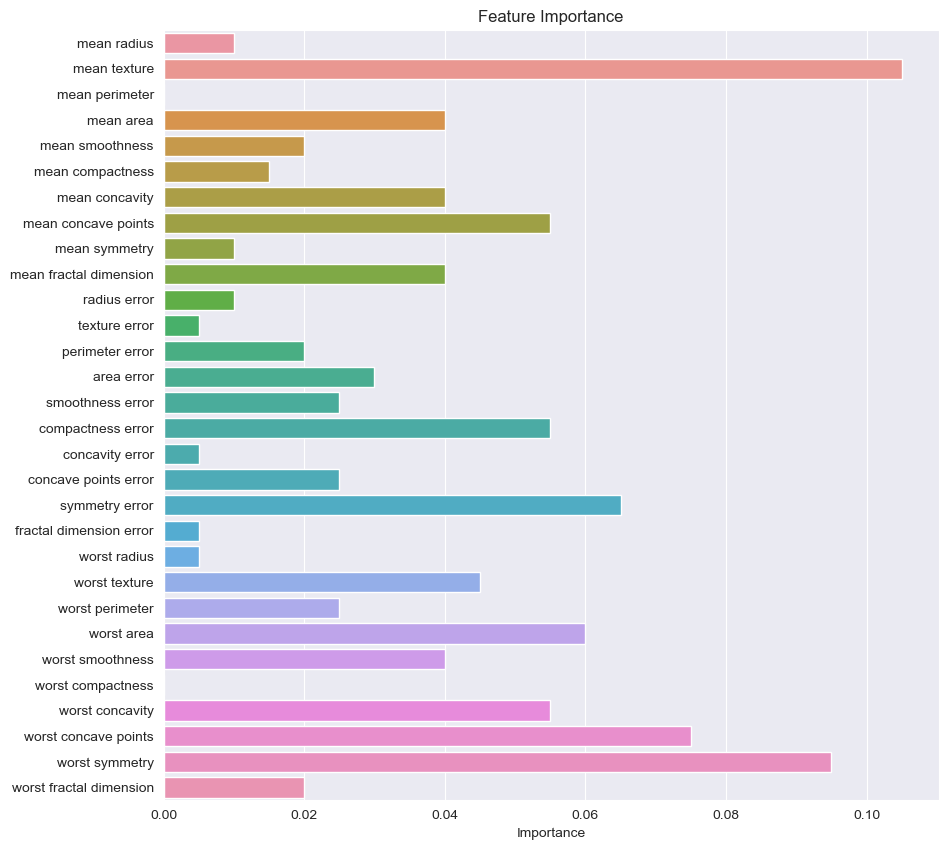

In [15]:
plt.figure(figsize=(10, 10))
sns.barplot(x=classifier.feature_importances_, y=datasets.load_breast_cancer().feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')

In [16]:
ten_best_features = np.argsort(classifier.feature_importances_)[-10:]

print(ten_best_features)

[ 6 21 15 26  7 23 18 27 28  1]


### Training and Testing the best model with the best features

In [21]:
X_train_sc_best = X_train_sc[:, ten_best_features]
X_test_sc_best = X_test_sc[:, ten_best_features]

print(X_train_sc_best.shape)

(364, 10)


In [22]:
classifier = AdaBoostClassifier(n_estimators=200, learning_rate=1, random_state=42)

classifier.fit(X_train_sc_best, y_train)

y_pred = classifier.predict(X_test_sc_best)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [24]:
print (cm)

[[39  4]
 [ 3 68]]


Text(0.5, 0, 'Importance')

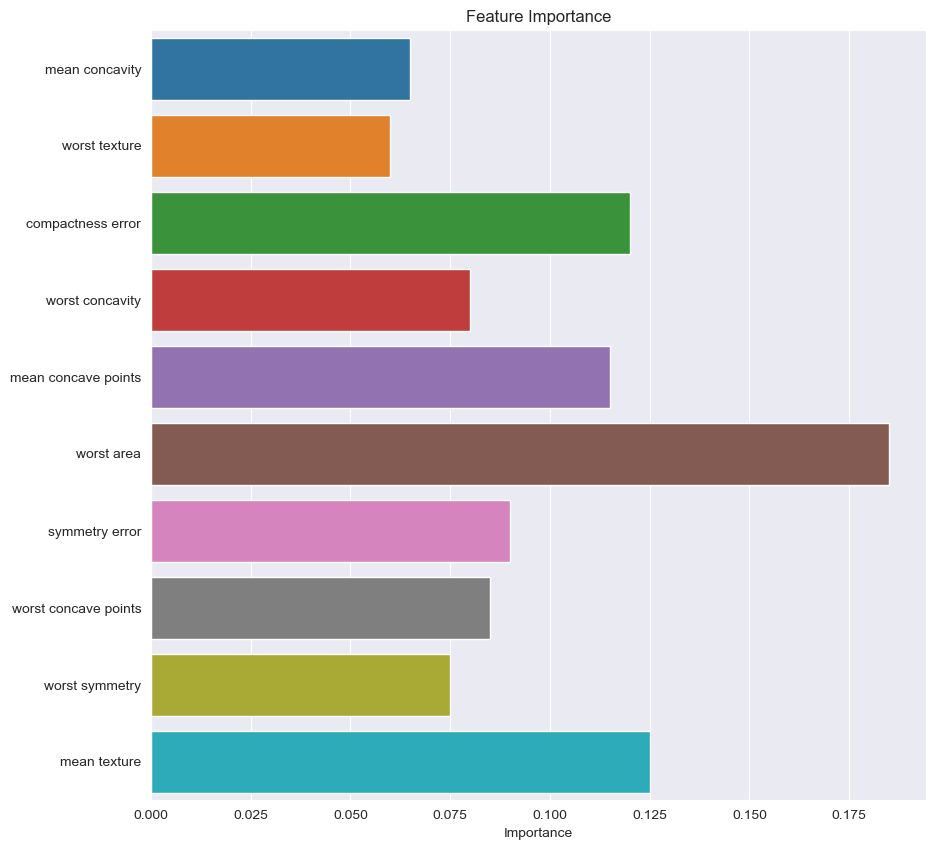

In [26]:
plt.figure(figsize=(10, 10))
sns.barplot(x=classifier.feature_importances_, y=datasets.load_breast_cancer().feature_names[ten_best_features])
plt.title('Feature Importance')
plt.xlabel('Importance')

### Discussion

- Added parameter - criterion: gini, entropy into Decision Tree and Random Forest
    - gini was better than entropy in Decision Tree and Random Forest
- The best parameters for Decision Tree:
    - criterion: gini
    - max_depth: 3
- The best parameters for Random Forest:
    - criterion: gini
    - max_depth: 7
    - n_estimators: 100
- The best parameters for AdaBoost:
    - learning_rate: 1
    - n_estimators: 200
- The accuracy of Decision Tree: 0.94
- The accuracy of Random Forest: 0.97
- The accuracy of AdaBoost: 0.97